In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load dataset

In [144]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


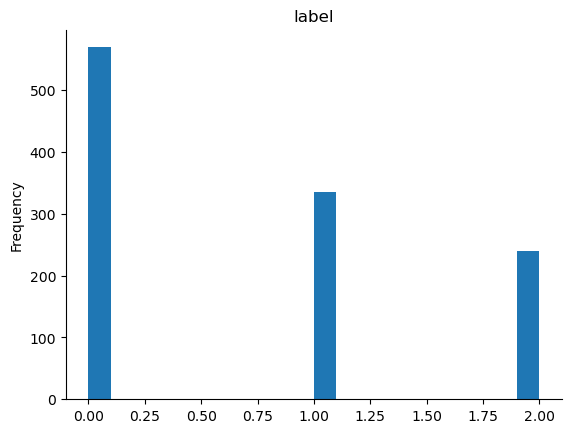

In [145]:
# @title label

from matplotlib import pyplot as plt
data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text Preprocessing

Case Folding

In [146]:
import re

#membuat fungsi untuk case folding
def casefolding(text):
  text = text.lower() #mengubah kalimat menjadi huruf kecil
  text = re.sub(r'https?://\S+|www\.\S+', '', text) #menghapus urll dari kalimat
  text = re.sub(r'[-+]?[0-9]+', '', text) #mmenghapus angka dari kalimat
  text = re.sub(r'[^\w\s]', '', text) #menghapus tanda baca dari kalimat
  text = text.strip()
  return text

In [147]:
#membandingkan before dan after casefolding
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('Case Folding\t :', case_folding)

Raw data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub


Word Normalization

In [148]:
key_norm = pd.read_csv('key_norm.csv')
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
  if(key_norm['singkat'] == word).any()
  else word for word in text.split()
  ])

  text = str.lower(text)
  return text

In [149]:
 #membandingkan
 raw_data = data['teks'].iloc[2]
 word_normal = text_normalize(case_folding)

 print('Raw Data\t :', raw_data)
 print('Word Normalize\t :', word_normal)

Raw Data	 : 2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Word Normalize	 : pelanggan yang terhormat sisa kuota flash anda kb download mytelkomsel apps di untuk cek kuotabeli paket flash atau hubungi


filtering (Stopword Removal)

In [150]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [151]:
len(stopwords_ind)

758

In [152]:
#melihat daftar stopwords dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [153]:
# membuat fungsi stopword removal

# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text .split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [154]:
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t :', stopword_removal)

Raw Data 		 : 2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding 		 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub
Stopword Removal 	 : plg yth sisa kuota flash kb download mytelkomsel apps utk cek kuotabeli paket flash hub


Stemming

In [155]:
!pip -q install sastrawi

In [156]:
#merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [157]:
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword removeal \t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : 2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding 		 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub
Stopword removeal 	 : plg yth sisa kuota flash kb download mytelkomsel apps utk cek kuotabeli paket flash hub
Stemming 		 : plg yth sisa kuota flash kb download mytelkomsel apps utk cek kuotabeli paket flash hub


Text preprocessing pipeline

In [158]:
#membuat fungsi untuk menggabungkan seluruh langkah text preeprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)

  return text


In [159]:
%%time
data['clean_teks'] = data['teks'].apply(text_preprocessing_process)

CPU times: total: 4min 22s
Wall time: 8min 40s


In [160]:
#simpan data
data.to_csv('clean_data.csv')

# Feature Engineering

In [161]:
# Memisahkan feature dan target
X = data['clean_teks']
y = data['label']

In [162]:
X

0       promo beli paket flash my telkomsel app extra ...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       langgan hormat sisa kuota flash kb download my...
3       langgan hormat sisa kuota flash kb download my...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [163]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

#Feature Extraction

In [166]:
#save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tfidf = vec_TF_IDF.transform(X)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [167]:
#menampikan  vocabulary dari hasil tf-idf

vec_TF_IDF.vocabulary_

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2876,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2879,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3014,
 'sk': 2692,
 'rupiah': 2504,
 'ribu': 2453,
 'spesial': 2751,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2558,
 'november': 1989,
 'langgan': 1577,
 'hormat': 1116,
 'sisa': 2685,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2693,
 'ekstra': 804,
 'pulsa': 2332,
 'rb': 2392,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2691,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2842,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2870,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3130,
 'ultima': 3067,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2844,
 'tselmefl': 3012,
 'coboy': 568

In [168]:
#melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

3254


In [169]:
#menampilkan feature apa saja yg ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [170]:
#membuat data tabular dati TF-IDF

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf = pd.DataFrame(x1, columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
#menampilkan data tabular yg ada nilai / ada bobotnya

data_tabular_tf_idf.iloc[10:20,60:70]

,akang,akangteteh,akbar,akreditasi,akses,aksi,aktif,aktifasi,aktivasi,aktivitas
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.149444,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.262305,0.0,0.000000,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.000000,0.0,0.244053,0.0,0.382416,0.0
15,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


#Feature Selection

In [172]:
x_train = np.array(data_tabular_tf_idf )
y_train = np.array(y)

In [173]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

chi2_feature = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_feature.fit_transform(x_train, y_train)

#untuk reduce feature
print('Original Feature Number', x_train.shape[1])
print('Reduce feature Number', x_kbest_features.shape[1])


Original Feature Number 3254
Reduce feature Number 3000


In [174]:
Data = pd.DataFrame(chi2_feature.scores_,columns=['Nilai'])
Data

,Nilai
0,0.835608
1,0.419698
2,1.558607
3,0.716455
4,0.800674
...,...
3249,1.180239
3250,0.503162
3251,0.716455
3252,2.918739


In [175]:
#menampilkan data feature beserta nilainya / pembobotannya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fiture'] = feature
Data

,Nilai,Fiture
0,0.835608,aa
1,0.419698,aamiiiin
2,1.558607,aamiin
3,0.716455,ab
4,0.800674,abadi
...,...,...
3249,1.180239,zalora
3250,0.503162,zarkasi
3251,0.716455,zjt
3252,2.918739,zona


In [176]:
#mengurutkan feature terbaik

Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fiture
2088,48.873388,paket
1030,46.356893,hadiah
1549,45.511857,kuota
2178,39.461815,pin
1486,34.488003,klik
...,...,...
1520,0.044714,kopi
307,0.044468,bca
1694,0.031579,maksimal
531,0.013783,cepat


In [177]:
mask = chi2_feature.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [178]:
#menampilkan fitur yang terpilih berdasarkan nilai mask dan chi tertinggi yang udah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_Feature=new_feature
selected_Feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajaaa',
 'ajabri',
 'ajak',
 'ajeng',
 'akang',
 'akangteteh',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alamsyah',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'ambil',
 'amin',


In [179]:
#membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_Feature:
    new_selected_feature[k]=v

new_selected_feature

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2876,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2879,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3014,
 'sk': 2692,
 'rupiah': 2504,
 'ribu': 2453,
 'spesial': 2751,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2558,
 'november': 1989,
 'langgan': 1577,
 'hormat': 1116,
 'sisa': 2685,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2693,
 'ekstra': 804,
 'pulsa': 2332,
 'rb': 2392,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2691,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2842,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2870,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3130,
 'ultima': 3067,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2844,
 'tselmefl': 3012,
 'coboy': 568

In [180]:
#menyimpan selected feature yang baru
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

In [182]:
#menampilkna fitur fitur yang sudah diseleksi
#menampilkan feature yang terpilih berdasarkan parameter k yang trpilih

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_Feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acaratks,account,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
# import library
import random
from sklearn.model_selection import train_test_split

x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [185]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X_train :', len(x_train))
print('Banyaknya X_test  :', len(x_test))
print('Banyaknya Y_train :', len(y_train))
print('Banyaknya Y_test  :', len(y_test))

Banyaknya X_train : 914
Banyaknya X_test  : 229
Banyaknya Y_train : 914
Banyaknya Y_test  : 229


In [186]:
# Inisialisasi model Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=0)

# Melatih model pada data pelatihan
log_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [187]:
model = log_reg_model.fit(x_train, y_train)

In [191]:
# membuat model prediksi
data_input = ("Tolong belikan dulu mama pulsa 25rb di no AS baru mama 085245318024 soalnya teman mama kecelakaan, skrg kluarganya hrus dihubungi, nti mama ganti")
data_input = text_preprocessing_process(data_input)

#load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if (hasil==0):
  s = "SMS Normal"
elif(hasil==1):
  s = "SMS Fraud"
else:
  s = "SMS Promo"

print("Hasil Prediksi : \n", s)


Hasil Prediksi : 
 SMS Fraud


In [193]:
# masukan library yang dibutuhkan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       126
           1       0.92      0.83      0.87        66
           2       0.91      0.78      0.84        37

    accuracy                           0.90       229
   macro avg       0.90      0.86      0.88       229
weighted avg       0.90      0.90      0.89       229



In [194]:
# menyimpan model
pickle.dump(model,open("model_fraud.sav","wb"))